# Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [136]:
# import numpy and pandas library
import pandas as pd
import numpy as np

In [137]:
df=pd.read_csv('bigdatamart_Train.csv')
#Downlaod Files:https://github.com/dsrscientist/bigdatamart_rep

In [138]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [139]:
#checking null values in the dataframe
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we see that 'Item_Weight' column has 1463 NaN values and 'Outlet_Size' column present 2410 NaN values out of 8523 columns

since 1463 missing value are present in "Item_Weight" column of the dataset.so we fill this missing value by mean value of the "Item_Weight" column

In [140]:
df["Item_Weight"]=df["Item_Weight"].replace(np.NaN,df["Item_Weight"].mean())

since 2410 missing values are present in the 'Outlet_Size' columns and this column is object type .so,we fill this missing value by which is maximum present in the 'Outlet_Size' column.

In [141]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [142]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [143]:
#Again checking null values in the dataframe
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

we see that there is no null value present in the dataframe

In [144]:
#checking colums name
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [145]:
#checking shape of the dataframe
df.shape

(8523, 12)

In [146]:
#checking datatypes of all columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Print the unique values of the non-numeric data.

In [148]:
#Print the unique values in the 'Item_Fat_Content' column
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


we see that 5 unique value present in the "Item_Fat_Content" column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

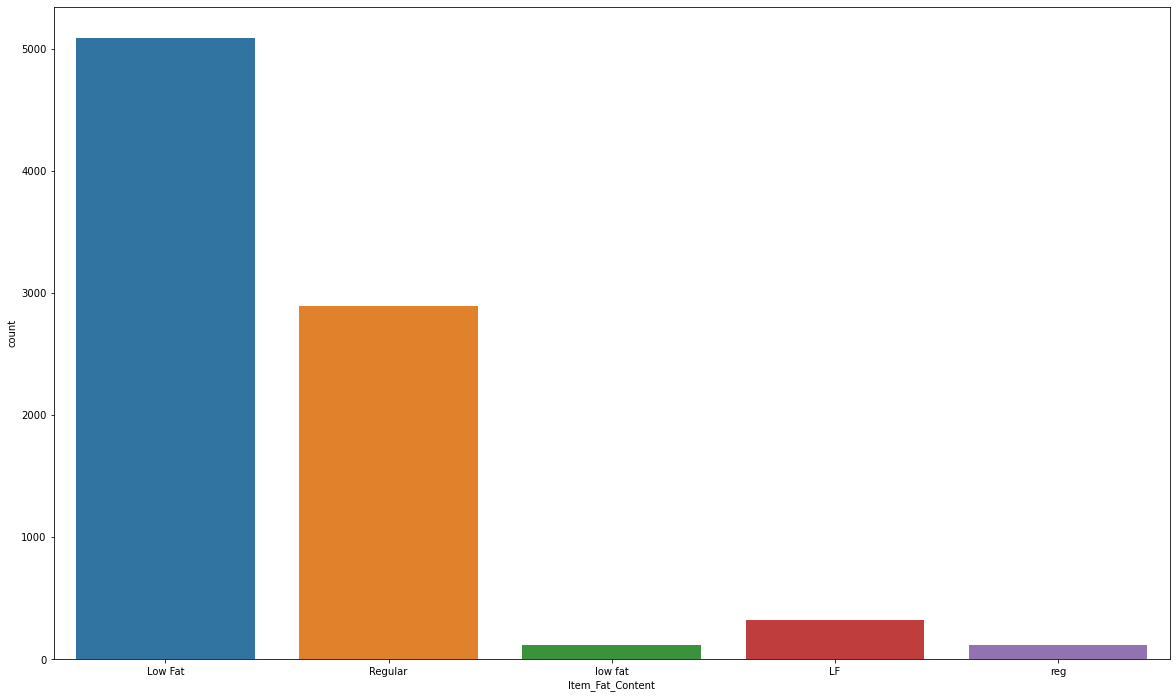

In [149]:
plt.figure(figsize=(20,12))
sns.countplot(df['Item_Fat_Content'])

In [150]:
#to change the non-numeric data to numeric data of 'Item_Fat_Content' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content']).astype(float)

In [151]:
print(df['Item_Fat_Content'].unique())

[1. 2. 3. 0. 4.]


In [152]:
#Print the unique values in the 'Outlet_Type' column
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

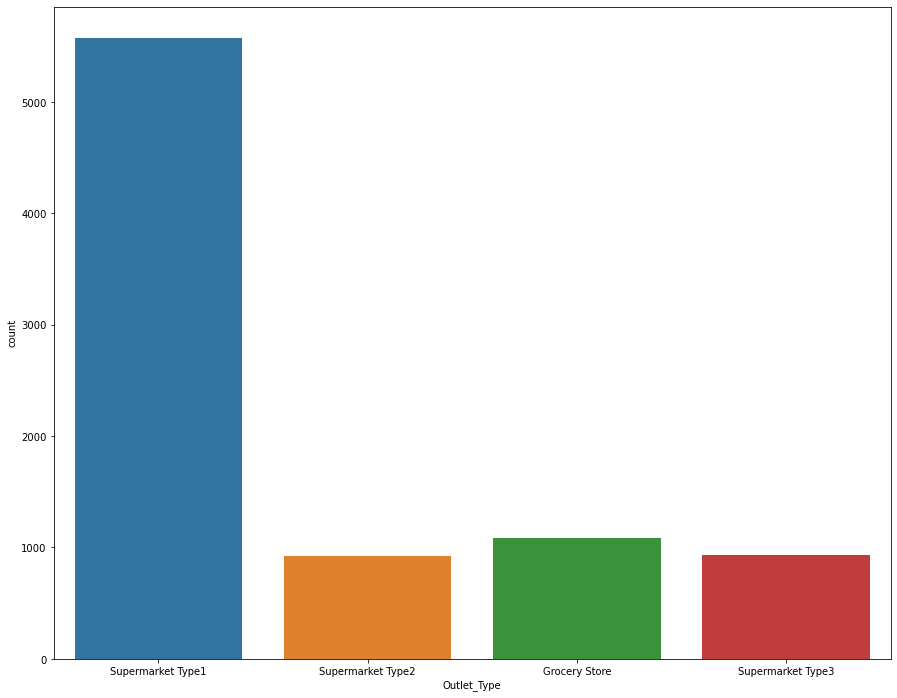

In [153]:
plt.figure(figsize=(15,12))
sns.countplot(df['Outlet_Type'])

In [154]:
#to change the non-numeric data to numeric data of 'Outlet_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Type']=le.fit_transform(df['Outlet_Type']).astype(float)

In [155]:
print(df['Outlet_Type'].unique())

[1. 2. 0. 3.]


In [156]:
#Print the unique values and count unique values in the 'Item_Type' column
print(df['Item_Type'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

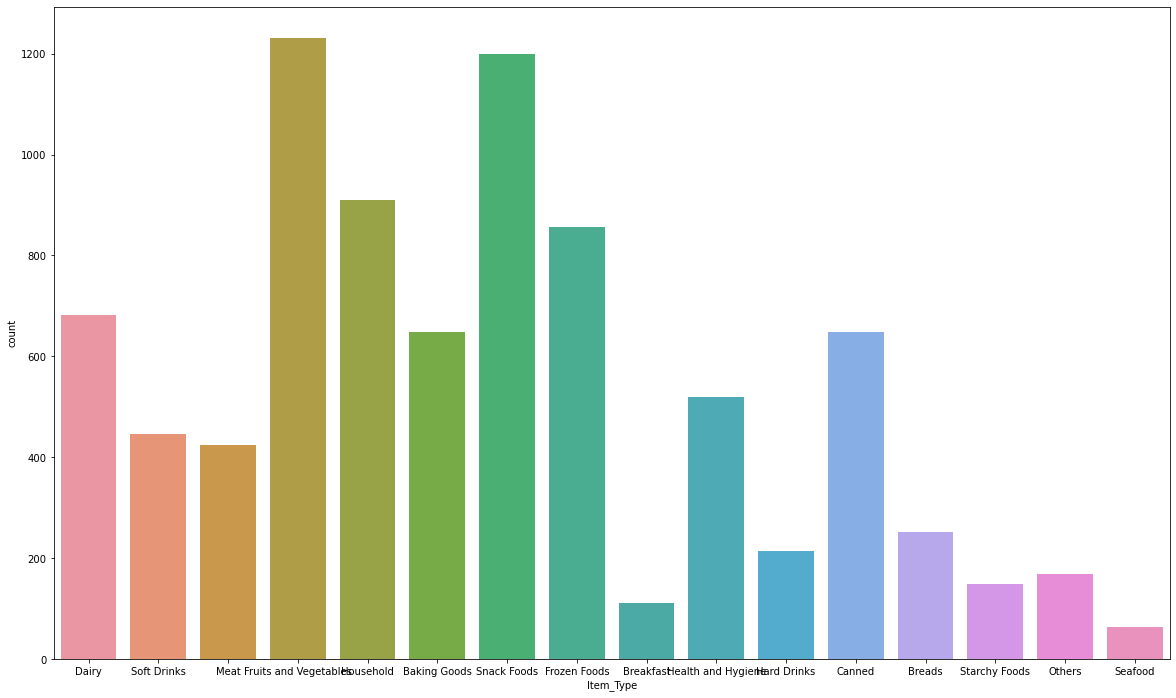

In [157]:
plt.figure(figsize=(20,12))
sns.countplot(df['Item_Type'])

In [158]:
#to change the non-numeric data to numeric data of 'Item_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type']).astype(float)

In [159]:
print(df['Item_Type'].value_counts())

6.0     1232
13.0    1200
9.0      910
5.0      856
4.0      682
3.0      649
0.0      648
8.0      520
14.0     445
10.0     425
1.0      251
7.0      214
11.0     169
15.0     148
2.0      110
12.0      64
Name: Item_Type, dtype: int64


In [160]:
#Print the unique values and count unique values in the 'Outlet_Identifier' column
print(df['Outlet_Identifier'].value_counts())

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

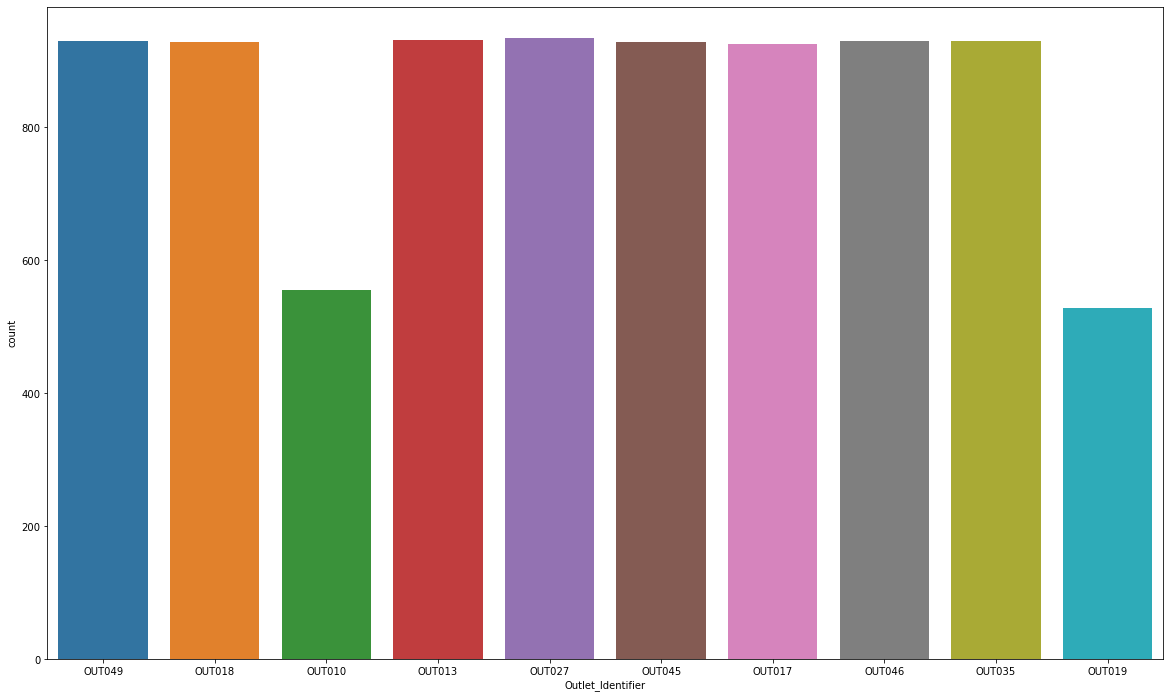

In [161]:
plt.figure(figsize=(20,12))
sns.countplot(df['Outlet_Identifier'])

In [162]:
#to change the non-numeric data to numeric data of 'Outlet_Identifier' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier']).astype(float)

In [163]:
print(df['Outlet_Identifier'].value_counts())

5.0    935
1.0    932
6.0    930
9.0    930
8.0    930
7.0    929
3.0    928
2.0    926
0.0    555
4.0    528
Name: Outlet_Identifier, dtype: int64


In [164]:
#Print the unique values and count unique values in the 'Outlet_Establishment_Year' column
print(df['Outlet_Establishment_Year'].value_counts())

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

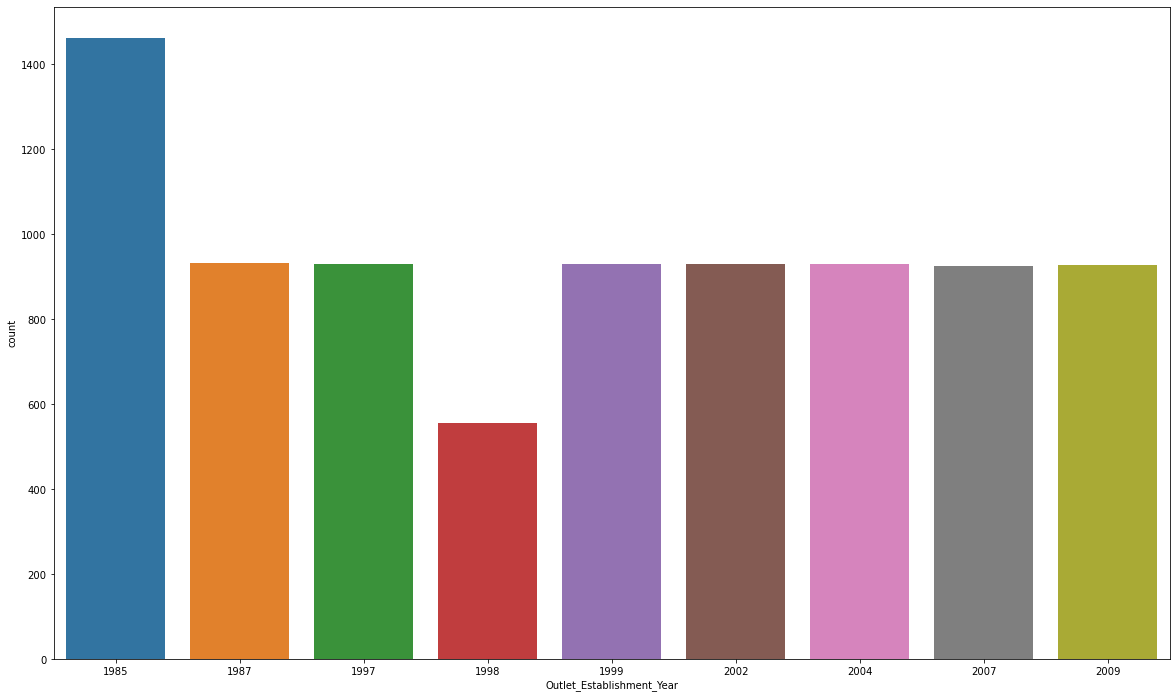

In [165]:
plt.figure(figsize=(20,12))
sns.countplot(df["Outlet_Establishment_Year"])

In [166]:
#to change the non-numeric data to numeric data of 'Outlet_Establishment_Year' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year']).astype(float)

In [167]:
print(df['Outlet_Establishment_Year'].value_counts())

0.0    1463
1.0     932
6.0     930
4.0     930
2.0     930
5.0     929
8.0     928
7.0     926
3.0     555
Name: Outlet_Establishment_Year, dtype: int64


In [168]:
#Print the unique values and count unique values in the 'Outlet_Size' column
print(df['Outlet_Size'].value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

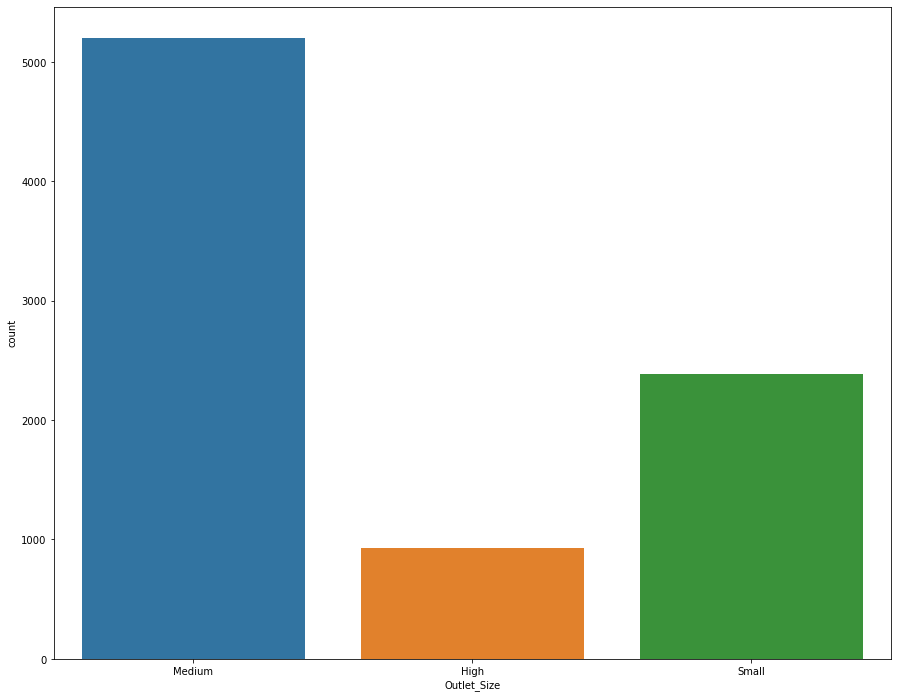

In [169]:
plt.figure(figsize=(15,12))
sns.countplot(df['Outlet_Size'])

In [170]:
#to change the non-numeric data to numeric data of 'Outlet_Size' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Size']=le.fit_transform(df['Outlet_Size']).astype(float)

In [171]:
print(df['Outlet_Size'].value_counts())

1.0    5203
2.0    2388
0.0     932
Name: Outlet_Size, dtype: int64


In [172]:
#Print the unique values and count unique values in the 'Outlet_Location_Type' column
print(df['Outlet_Location_Type'].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

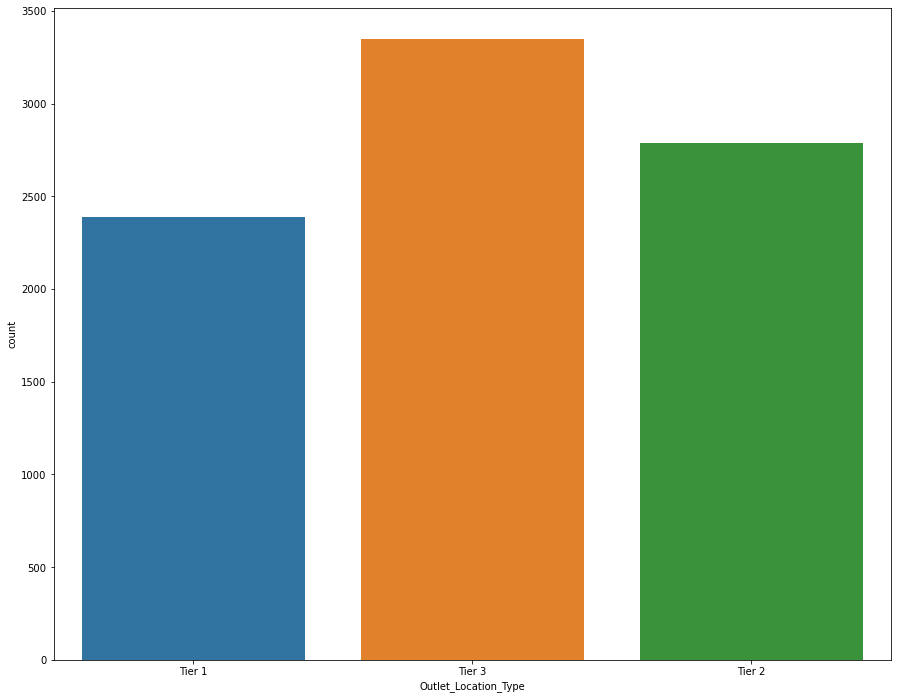

In [173]:
plt.figure(figsize=(15,12))
sns.countplot(df['Outlet_Location_Type'])

In [174]:
#to change the non-numeric data to numeric data of 'Outlet_Location_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type']).astype(float)

In [175]:
print(df['Outlet_Location_Type'].value_counts())

2.0    3350
1.0    2785
0.0    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

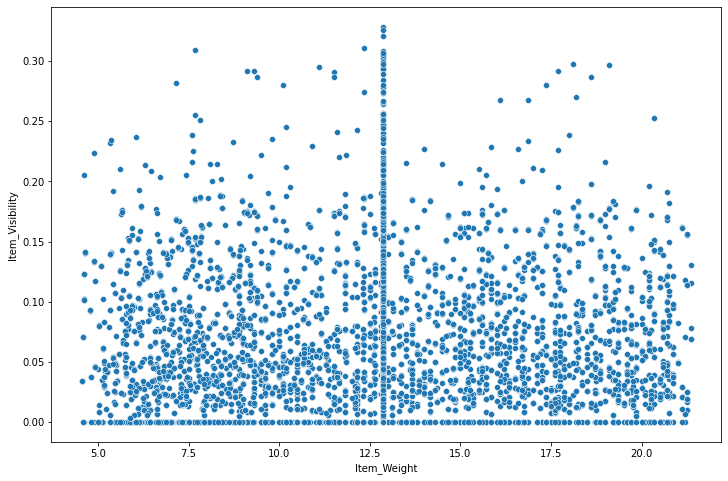

In [176]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Item_Weight'],df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

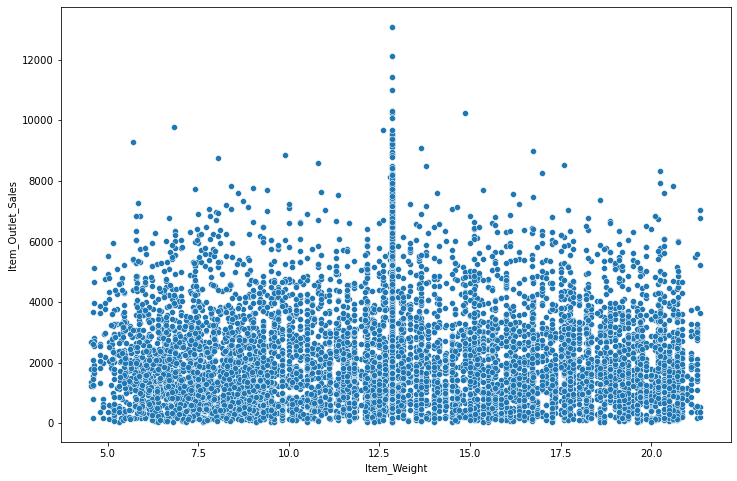

In [177]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Item_Weight'],df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

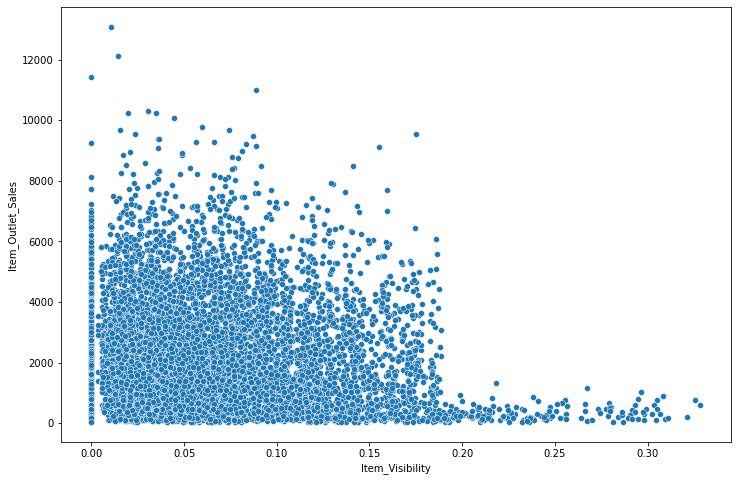

In [178]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Item_Visibility'],df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

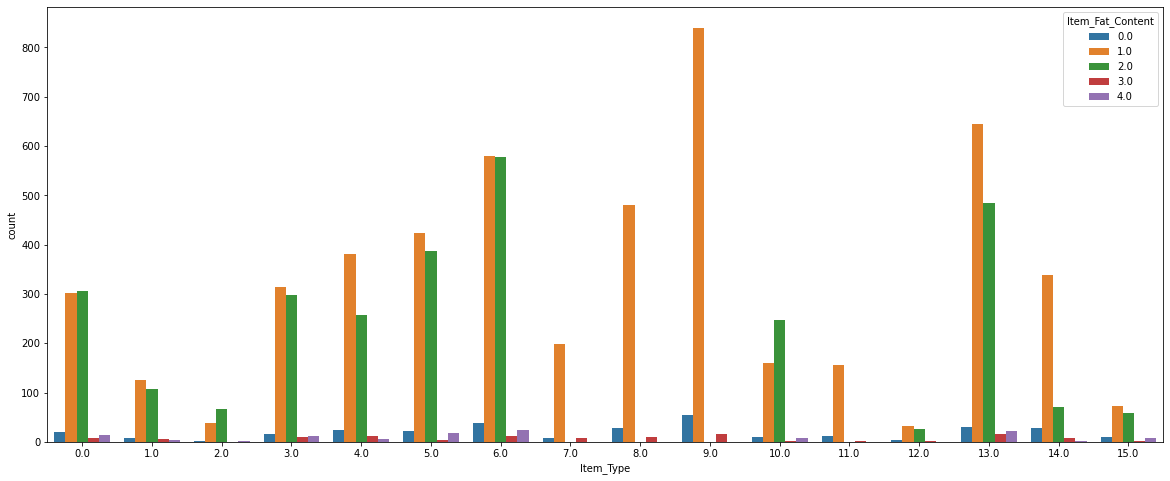

In [179]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Item_Type'],hue=df['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

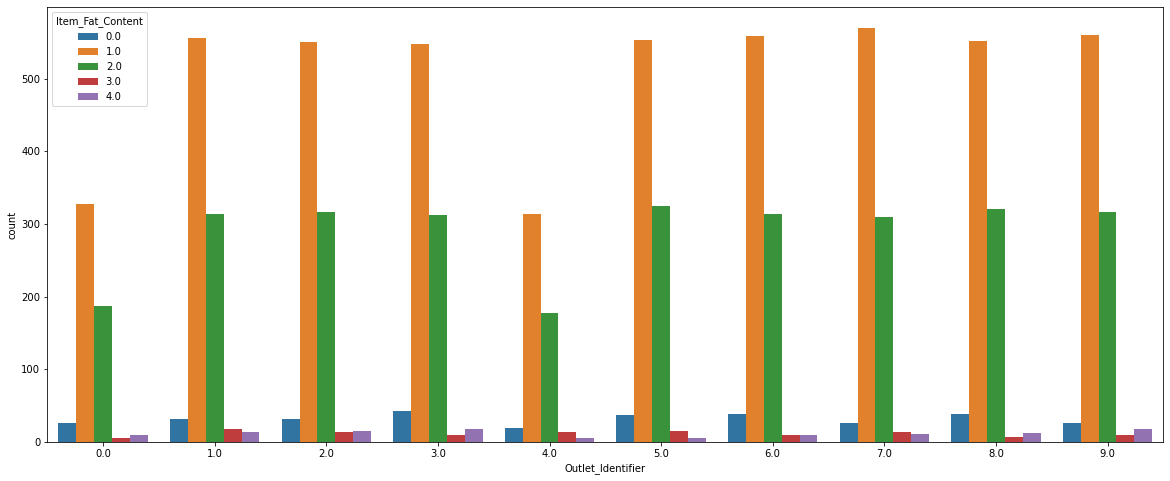

In [180]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Outlet_Identifier'],hue=df['Item_Fat_Content'])

In [181]:
#checking correlation
df.corr()

Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Weight                   1.000000         -0.017331        -0.012049   
Item_Fat_Content             -0.017331          1.000000         0.034042   
Item_Visibility              -0.012049          0.034042         1.000000   
Item_Type                     0.028015         -0.115958        -0.035249   
Item_MRP                      0.024756         -0.000876        -0.001315   
Outlet_Identifier            -0.007975         -0.002357        -0.100439   
Outlet_Establishment_Year    -0.007489          0.001595        -0.082927   
Outlet_Size                  -0.007225         -0.012058         0.069309   
Outlet_Location_Type          0.004088         -0.004102        -0.028099   
Outlet_Type                  -0.000566         -0.004214        -0.173468   
Item_Outlet_Sales             0.011550          0.009800        -0.128625   

                           Item_Type  Item_MRP  Outlet_Identifier  \
Item_Weight                 0.028015  0.024756          -0.007975   
Item_Fat_Content           -0.115958 -0.000876          -0.002357   
Item_Visibility            -0.035249 -0.001315          -0.100439   
Item_Type                   1.000000  0.032651           0.001656   
Item_MRP                    0.032651  1.000000           0.003319   
Outlet_Identifier           0.001656  0.003319           1.000000   
Outlet_Establishment_Year   0.006527  0.004162          -0.030969   
Outlet_Size                -0.001859  0.006059           0.504603   
Outlet_Location_Type        0.003084  0.000232          -0.716176   
Outlet_Type                 0.003053 -0.001975           0.099873   
Item_Outlet_Sales           0.017048  0.567574           0.162325   

                           Outlet_Establishment_Year  Outlet_Size  \
Item_Weight                                -0.007489    -0.007225   
Item_Fat_Content                            0.001595    -0.012058   
Item_Visibility                            -0.082927     0.069309   
Item_Type                                   0.006527    -0.001859   
Item_MRP                                    0.004162     0.006059   
Outlet_Identifier                          -0.030969     0.504603   
Outlet_Establishment_Year                   1.000000     0.070786   
Outlet_Size                                 0.070786     1.000000   
Outlet_Location_Type                        0.042005    -0.614311   
Outlet_Type                                -0.040040    -0.201483   
Item_Outlet_Sales                          -0.025525    -0.086182   

                           Outlet_Location_Type  Outlet_Type  \
Item_Weight                            0.004088    -0.000566   
Item_Fat_Content                      -0.004102    -0.004214   
Item_Visibility                       -0.028099    -0.173468   
Item_Type                              0.003084     0.003053   
Item_MRP                               0.000232    -0.001975   
Outlet_Identifier                     -0.716176     0.099873   
Outlet_Establishment_Year              0.042005    -0.040040   
Outlet_Size                           -0.614311    -0.201483   
Outlet_Location_Type                   1.000000     0.467219   
Outlet_Type                            0.467219     1.000000   
Item_Outlet_Sales                      0.089367     0.401522   

                           Item_Outlet_Sales  
Item_Weight                         0.011550  
Item_Fat_Content                    0.009800  
Item_Visibility                    -0.128625  
Item_Type                           0.017048  
Item_MRP                            0.567574  
Outlet_Identifier                   0.162325  
Outlet_Establishment_Year          -0.025525  
Outlet_Size                        -0.086182  
Outlet_Location_Type                0.089367  
Outlet_Type                         0.401522  
Item_Outlet_Sales                   1.000000

<AxesSubplot:>

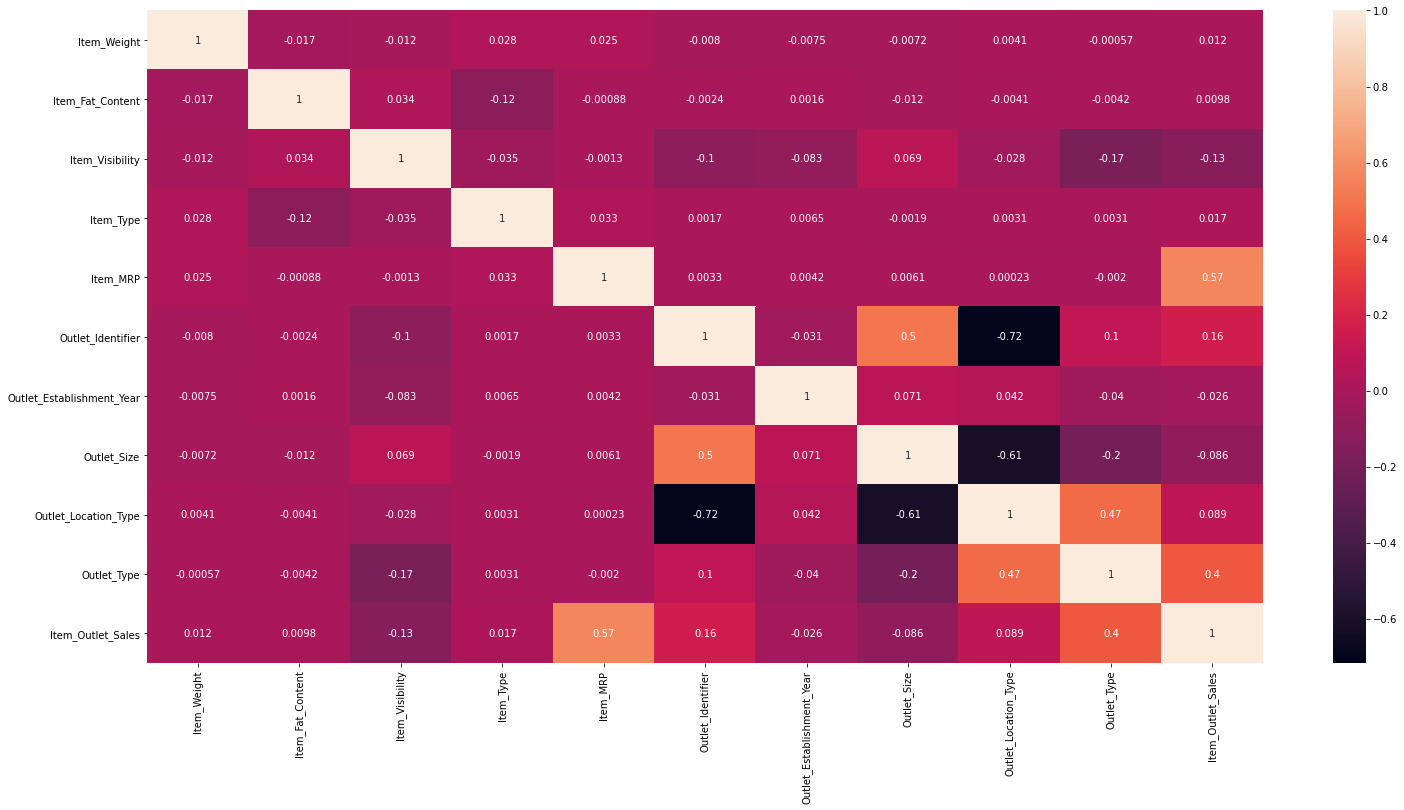

In [182]:
#checking correlation by heatmap
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True)

we see that 1."Item_weight" is 1.2% positively correlated with our target column which is not consider as a good correlation
2."Item_Visibility" is 13% negatively correlated with our target column which is consider as a bad correlation
3."Item_MRP" is 57% positively correlated with our target column which is consider as a very good correlation
4.the correlation between "Item_weight" and "Item_Visibility" is -1.2% which is consider as a bad correlation
5.the correlation between "Item_Visibility" and "Item_MRP" is -0.13% which is consider as a very bad correlation
6.the correlation between "Item_weight" and "Item_MRP" is 2.5% which is not consider as a good correlation

In [183]:
#skewness checking
df.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

heavy skewness present in below column:
    1.Item_Fat_Content
    2.Outlet_Type  
    3.Item_Outlet_Sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

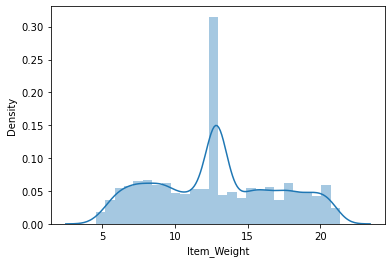

In [184]:
#checking normal distribution curve of "Item_Weight" column
sns.distplot(df["Item_Weight"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

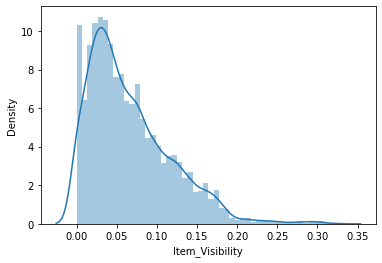

In [185]:
#checking normal distribution curve of "Item_Visibility" column
sns.distplot(df["Item_Visibility"])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

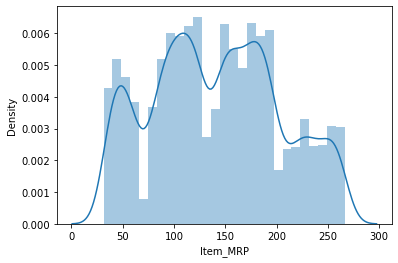

In [186]:
#checking normal distribution curve of "Item_MRP" column
sns.distplot(df["Item_MRP"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

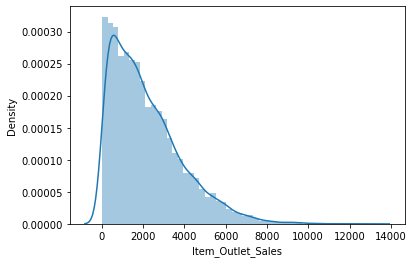

In [187]:
#checking normal distribution curve of "Item_Outlet_Sales" column
sns.distplot(df["Item_Outlet_Sales"])

In [188]:
#describing dataset
df.describe()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.369354         0.066132     7.226681   
std       4.226124          0.644810         0.051598     4.209990   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.310000          1.000000         0.026989     4.000000   
50%      12.857645          1.000000         0.053931     6.000000   
75%      16.000000          2.000000         0.094585    10.000000   
max      21.350000          4.000000         0.328391    15.000000   

          Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000        8523.000000                8523.000000  8523.000000   
mean    140.992782           4.722281                   3.790684     1.170832   
std      62.275067           2.837201                   2.730322     0.600327   
min      31.290000           0.000000                   0.000000     0.000000   
25%      93.826500           2.000000                   1.000000     1.000000   
50%     143.012800           5.000000                   4.000000     1.000000   
75%     185.643700           7.000000                   6.000000     2.000000   
max     266.888400           9.000000                   8.000000     2.000000   

       Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
count           8523.000000  8523.000000        8523.000000  
mean               1.112871     1.201220        2181.288914  
std                0.812757     0.796459        1706.499616  
min                0.000000     0.000000          33.290000  
25%                0.000000     1.000000         834.247400  
50%                1.000000     1.000000        1794.331000  
75%                2.000000     1.000000        3101.296400  
max                2.000000     3.000000       13086.964800

from the above code we see that mean,standard_deviation,minimum value,25th percentile,50th percentile,75th percentile,maximum value of every column which is present in the dataset.

<AxesSubplot:>

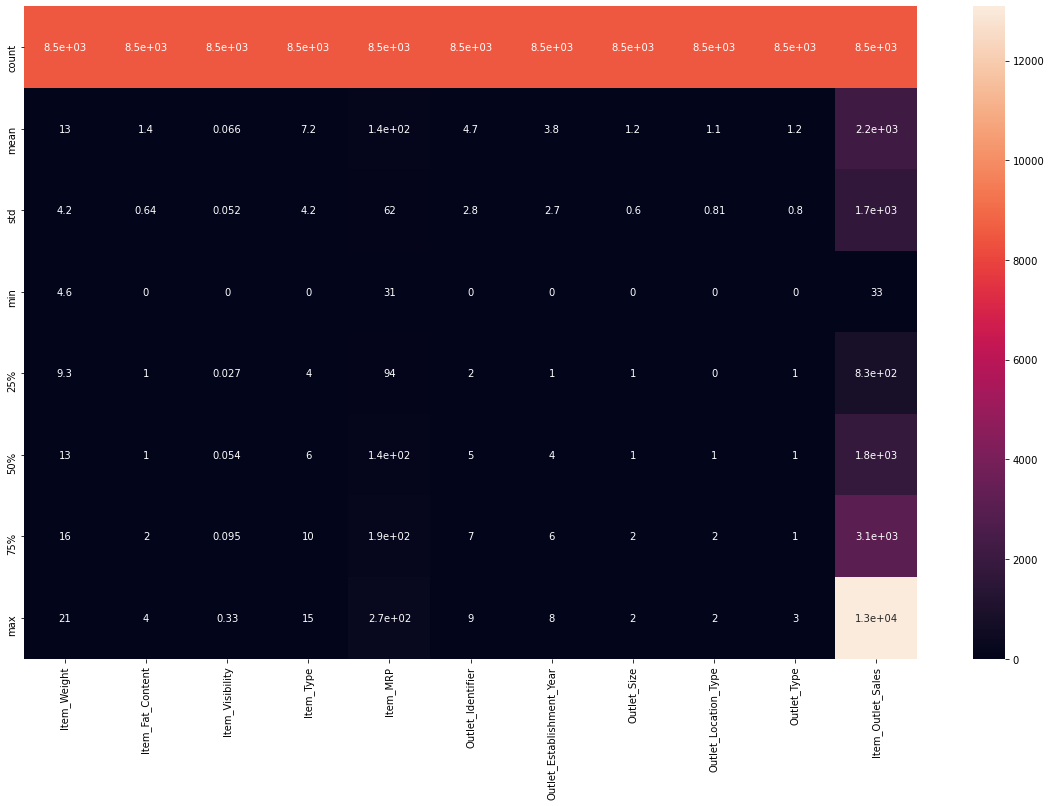

In [189]:
#describing "Titanic" by using heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.describe(),annot=True)

# Checking Outliers

<AxesSubplot:xlabel='Item_Weight'>

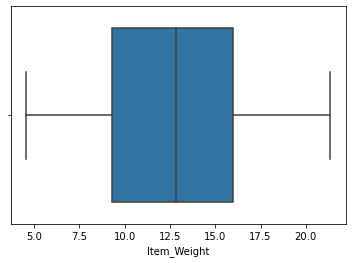

In [190]:
#checking outliers in "Item_Weight" column by box plot
sns.boxplot(df["Item_Weight"])

we see that there is no out liers in the "Item_Weight" column

<AxesSubplot:xlabel='Item_Visibility'>

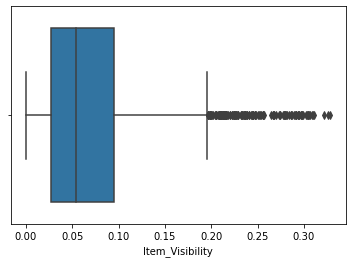

In [191]:
#checking outliers in "Item_Visibility" column by box plot
sns.boxplot(df["Item_Visibility"])

we see that many outliers are present in the "Item_Visibility" columns

<AxesSubplot:xlabel='Item_MRP'>

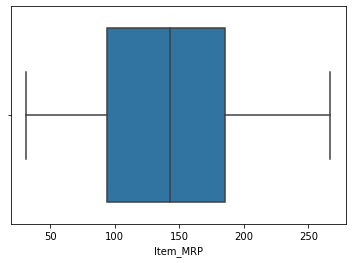

In [192]:
#checking outliers in "Item_MRP" column by box plot
sns.boxplot(df["Item_MRP"])

we see that there is no out liers in the "Item_MRP" column

<AxesSubplot:xlabel='Item_Outlet_Sales'>

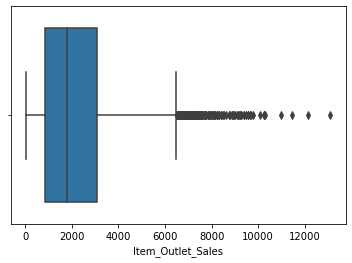

In [193]:
#checking outliers in "Item_Outlet_Sales" column by box plot
sns.boxplot(df["Item_Outlet_Sales"])

we see that many outliers are present in the "Item_Outlet_Sales" columns

In [194]:
#droping "Item_Identifier" columns
df=df.drop(["Item_Identifier"],axis=1)

Removing outliers and save the model into df_new variable

In [195]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.84187169, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.64170589, 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.09855449, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.53424315, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.33644372, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.45963367, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [196]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [197]:
df_new=df[(z<3).all(axis=1)]
df_new

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300               1.0         0.016047        4.0  249.8092   
1           5.920               2.0         0.019278       14.0   48.2692   
2          17.500               1.0         0.016760       10.0  141.6180   
3          19.200               2.0         0.000000        6.0  182.0950   
4           8.930               1.0         0.000000        9.0   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865               1.0         0.056783       13.0  214.5218   
8519        8.380               2.0         0.046982        0.0  108.1570   
8520       10.600               1.0         0.035186        8.0   85.1224   
8521        7.210               2.0         0.145221       13.0  103.1332   
8522       14.800               1.0         0.044878       14.0   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                   9.0                        4.0          1.0   
1                   3.0                        8.0          1.0   
2                   9.0                        4.0          1.0   
3                   0.0                        3.0          1.0   
4                   1.0                        1.0          0.0   
...                 ...                        ...          ...   
8518                1.0                        1.0          0.0   
8519                7.0                        5.0          1.0   
8520                6.0                        6.0          2.0   
8521                3.0                        8.0          1.0   
8522                8.0                        2.0          2.0   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                      0.0          1.0          3735.1380  
1                      2.0          2.0           443.4228  
2                      0.0          1.0          2097.2700  
3                      2.0          0.0           732.3800  
4                      2.0          1.0           994.7052  
...                    ...          ...                ...  
8518                   2.0          1.0          2778.3834  
8519                   1.0          1.0           549.2850  
8520                   1.0          1.0          1193.1136  
8521                   2.0          2.0          1845.5976  
8522                   0.0          1.0           765.6700  

[8222 rows x 11 columns]

In [198]:
print(df.shape)
print(df_new.shape)

(8523, 11)
(8222, 11)


In [199]:
#checking percentage of dataloss
percentage_of_dataloss=((8523-8222)/8523)*100
percentage_of_dataloss

3.5316203214830457

we see that percentage of data loss is 3.53

In [200]:
df_new=df_new.drop([],axis=1)

Dividing data in features and vectors

In [201]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [202]:
x

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300               1.0         0.016047        4.0  249.8092   
1           5.920               2.0         0.019278       14.0   48.2692   
2          17.500               1.0         0.016760       10.0  141.6180   
3          19.200               2.0         0.000000        6.0  182.0950   
4           8.930               1.0         0.000000        9.0   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865               1.0         0.056783       13.0  214.5218   
8519        8.380               2.0         0.046982        0.0  108.1570   
8520       10.600               1.0         0.035186        8.0   85.1224   
8521        7.210               2.0         0.145221       13.0  103.1332   
8522       14.800               1.0         0.044878       14.0   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                   9.0                        4.0          1.0   
1                   3.0                        8.0          1.0   
2                   9.0                        4.0          1.0   
3                   0.0                        3.0          1.0   
4                   1.0                        1.0          0.0   
...                 ...                        ...          ...   
8518                1.0                        1.0          0.0   
8519                7.0                        5.0          1.0   
8520                6.0                        6.0          2.0   
8521                3.0                        8.0          1.0   
8522                8.0                        2.0          2.0   

      Outlet_Location_Type  Outlet_Type  
0                      0.0          1.0  
1                      2.0          2.0  
2                      0.0          1.0  
3                      2.0          0.0  
4                      2.0          1.0  
...                    ...          ...  
8518                   2.0          1.0  
8519                   1.0          1.0  
8520                   1.0          1.0  
8521                   2.0          2.0  
8522                   0.0          1.0  

[8222 rows x 10 columns]

In [203]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [205]:
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [206]:
#checking VIF score
vif_clac()

   VIF Factor                   features
0    8.609855                Item_Weight
1    5.840789           Item_Fat_Content
2    2.790570            Item_Visibility
3    3.791433                  Item_Type
4    5.707160                   Item_MRP
5   10.910806          Outlet_Identifier
6    3.059811  Outlet_Establishment_Year
7    6.801092                Outlet_Size
8   10.299000       Outlet_Location_Type
9    7.800962                Outlet_Type


we see that "Outlet_Identifier" and "Outlet_Location_Type" column's vif score is same.
since correlation between "Outlet_Identifier" and target column less than correlation between "Outlet_Location_Type" and target column,we drop "Outlet_Identifier" column. 

In [207]:
x=x.drop(["Outlet_Identifier","Outlet_Establishment_Year"],axis=1)

In [208]:
x

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300               1.0         0.016047        4.0  249.8092   
1           5.920               2.0         0.019278       14.0   48.2692   
2          17.500               1.0         0.016760       10.0  141.6180   
3          19.200               2.0         0.000000        6.0  182.0950   
4           8.930               1.0         0.000000        9.0   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865               1.0         0.056783       13.0  214.5218   
8519        8.380               2.0         0.046982        0.0  108.1570   
8520       10.600               1.0         0.035186        8.0   85.1224   
8521        7.210               2.0         0.145221       13.0  103.1332   
8522       14.800               1.0         0.044878       14.0   75.4670   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0             1.0                   0.0          1.0  
1             1.0                   2.0          2.0  
2             1.0                   0.0          1.0  
3             1.0                   2.0          0.0  
4             0.0                   2.0          1.0  
...           ...                   ...          ...  
8518          0.0                   2.0          1.0  
8519          1.0                   1.0          1.0  
8520          2.0                   1.0          1.0  
8521          1.0                   2.0          2.0  
8522          2.0                   0.0          1.0  

[8222 rows x 8 columns]

In [210]:
x=pd.get_dummies(x,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [211]:
x

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_0.0  \
0           9.300         0.016047  249.8092                     0   
1           5.920         0.019278   48.2692                     0   
2          17.500         0.016760  141.6180                     0   
3          19.200         0.000000  182.0950                     0   
4           8.930         0.000000   53.8614                     0   
...           ...              ...       ...                   ...   
8518        6.865         0.056783  214.5218                     0   
8519        8.380         0.046982  108.1570                     0   
8520       10.600         0.035186   85.1224                     0   
8521        7.210         0.145221  103.1332                     0   
8522       14.800         0.044878   75.4670                     0   

      Item_Fat_Content_1.0  Item_Fat_Content_2.0  Item_Fat_Content_3.0  \
0                        1                     0                     0   
1                        0                     1                     0   
2                        1                     0                     0   
3                        0                     1                     0   
4                        1                     0                     0   
...                    ...                   ...                   ...   
8518                     1                     0                     0   
8519                     0                     1                     0   
8520                     1                     0                     0   
8521                     0                     1                     0   
8522                     1                     0                     0   

      Item_Type_0.0  Item_Type_1.0  Item_Type_2.0  ...  Outlet_Size_0.0  \
0                 0              0              0  ...                0   
1                 0              0              0  ...                0   
2                 0              0              0  ...                0   
3                 0              0              0  ...                0   
4                 0              0              0  ...                1   
...             ...            ...            ...  ...              ...   
8518              0              0              0  ...                1   
8519              1              0              0  ...                0   
8520              0              0              0  ...                0   
8521              0              0              0  ...                0   
8522              0              0              0  ...                0   

      Outlet_Size_1.0  Outlet_Size_2.0  Outlet_Location_Type_0.0  \
0                   1                0                         1   
1                   1                0                         0   
2                   1                0                         1   
3                   1                0                         0   
4                   0                0                         0   
...               ...              ...                       ...   
8518                0                0                         0   
8519                1                0                         0   
8520                0                1                         0   
8521                1                0                         0   
8522                0                1                         1   

      Outlet_Location_Type_1.0  Outlet_Location_Type_2.0  Outlet_Type_0.0  \
0                            0                         0                0   
1                            0                         1                0   
2                            0                         0                0   
3                            0                         1                1   
4                            0                         1                0   
...                        ...                       ...              ...   
8518               

transforming data to remove skewness

In [212]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.81766492, -1.1399084 ,  1.64112176, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-1.72429667, -1.03076718, -1.59302569, ..., -1.40945384,
         2.83463663, -0.34377762],
       [ 1.07935446, -1.11556043,  0.09617342, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       ...,
       [-0.49341755, -0.53658307, -0.85859194, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-1.36561856,  1.53538339, -0.537346  , ..., -1.40945384,
         2.83463663, -0.34377762],
       [ 0.48880913, -0.26756365, -1.0394109 , ...,  0.70949468,
        -0.3527789 , -0.34377762]])

In [213]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.81766492, -1.1399084 ,  1.64112176, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-1.72429667, -1.03076718, -1.59302569, ..., -1.40945384,
         2.83463663, -0.34377762],
       [ 1.07935446, -1.11556043,  0.09617342, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       ...,
       [-0.49341755, -0.53658307, -0.85859194, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-1.36561856,  1.53538339, -0.537346  , ..., -1.40945384,
         2.83463663, -0.34377762],
       [ 0.48880913, -0.26756365, -1.0394109 , ...,  0.70949468,
        -0.3527789 , -0.34377762]])

In [214]:
#print skewness after power transform
df_new=pd.DataFrame(x)
df_new.skew()

0     -0.069934
1      0.116318
2     -0.112220
3      4.881520
4     -0.437315
5      0.663365
6      8.512994
7      3.203460
8      5.544233
9      8.811852
10     3.187176
11     3.120677
12     2.674381
13     2.039588
14     6.000525
15     3.610627
16     2.510168
17     4.136712
18     6.759330
19    11.482267
20     2.082801
21     4.000783
22     7.582459
23     2.474455
24    -0.447246
25     0.981589
26     0.986303
27     0.712274
28     0.456159
29     2.361757
30    -0.700087
31     2.482311
32     2.565548
dtype: float64

The data is preprocessed and the data is ready fo training process

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [216]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
m=0
for i in range (0,5500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.35,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.5771846593017165 at random state= 920


In [217]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.35,random_state=920)

In [218]:
train_x

array([[-1.56637555, -0.57248494,  0.19893753, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [ 0.04552811,  0.3937924 ,  0.30792751, ..., -1.40945384,
        -0.3527789 ,  2.90885715],
       [ 1.22822002,  1.71598262, -1.83022347, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       ...,
       [ 1.74744757, -0.41667316,  0.2241212 , ..., -1.40945384,
         2.83463663, -0.34377762],
       [ 0.04552811, -0.22710915,  0.27738033, ..., -1.40945384,
        -0.3527789 ,  2.90885715],
       [ 0.04552811,  0.71388538, -0.10537849, ..., -1.40945384,
        -0.3527789 , -0.34377762]])

In [219]:
test_x

array([[ 1.65533806, -1.0470772 ,  1.26938187, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-1.42281401,  1.60405705, -0.47024337, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-0.81766492, -0.33066155, -0.16105237, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       ...,
       [ 1.41730291,  0.84616834,  1.44693152, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-0.56725522, -1.73127052, -0.32319286, ...,  0.70949468,
        -0.3527789 , -0.34377762],
       [-0.54381181, -0.6816421 , -0.31316805, ..., -1.40945384,
         2.83463663, -0.34377762]])

In [220]:
train_y

1661    3399.5748
3423    5141.3076
513      219.7140
3799    1060.6194
5059    3451.5072
          ...    
111     2732.4432
7583    1867.5690
1625    2267.0490
4832    3998.7948
6831     254.3356
Name: Item_Outlet_Sales, Length: 5344, dtype: float64

In [221]:
test_y

5601    3113.2808
7678    2876.2560
7948    2848.2924
1231    2612.5992
7913    4693.8900
          ...    
3940      40.6138
6242    1895.5326
3606    4673.9160
7040    1717.7640
6832    1259.6936
Name: Item_Outlet_Sales, Length: 2878, dtype: float64

In [222]:
train_x.shape

(5344, 33)

In [223]:
test_x.shape

(2878, 33)

In [224]:
train_y.shape

(5344,)

In [225]:
test_y.shape

(2878,)

In [226]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.5771846593017165

In [227]:
lm.coef_

array([ 1.76232754e+01, -2.18428552e+01,  9.24356279e+02, -6.19317744e+13,
       -1.59561636e+14, -1.55028002e+14, -3.73613760e+13, -1.83986359e+14,
       -1.17892347e+14, -7.68991938e+13, -1.84661224e+14, -1.87458729e+14,
       -2.08060440e+14, -2.43230855e+14, -1.09857138e+14, -1.68341030e+14,
       -2.16486664e+14, -1.51222611e+14, -9.85747963e+13, -5.96183967e+13,
       -2.40618994e+14, -1.55346518e+14, -8.86094435e+13, -1.56803966e+14,
       -2.43410759e+14, -2.23914797e+14,  1.25922112e+15,  1.32262207e+15,
        1.36882711e+15, -4.67338847e+14, -6.82496422e+14, -4.53713915e+14,
       -4.44616405e+14])

In [228]:
lm.intercept_

2158.832443319611

Error of Llinear regression Model

In [229]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  834.1642873564501
Mean Squared Error:  1201920.4269249935
Root Mean Squared Error:  1096.321315548044


In [230]:
predlm

array([3598.08244332, 1761.83244332, 2147.95744332, ..., 3624.33244332,
       2119.33244332, 1703.83244332])

In [231]:
test_y

5601    3113.2808
7678    2876.2560
7948    2848.2924
1231    2612.5992
7913    4693.8900
          ...    
3940      40.6138
6242    1895.5326
3606    4673.9160
7040    1717.7640
6832    1259.6936
Name: Item_Outlet_Sales, Length: 2878, dtype: float64

In [232]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.5165575189381733


In [233]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.5523358107135141


# Using DecisionTreeRegressor

In [234]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train_x,train_y)

DecisionTreeRegressor()

In [235]:
regressor.score(train_x,train_y)

1.0

In [236]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(regressor,x,y,cv=10)
print("cross validation score of DecisionTreeRegressor is =",scr.mean())

cross validation score of DecisionTreeRegressor is = 0.13890749451746184


# Using RandomForestRegressor

In [237]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train_x,train_y)
rf_pred=rf.predict(test_x)
rf.score(train_x,train_y)

0.9375657805481707

In [238]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestRegressor is =",scr.mean())

cross validation score of RandomForestRegressor is = 0.524388204066521


# Using Lasso Regression

In [239]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.5771841963509402

In [240]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ls,x,y,cv=5)
print("cross validation score of  Lasso Regression is =",scr.mean())

cross validation score of  Lasso Regression is = 0.5523564485569159


Best parameter Tuning for the Lasso Regression

In [241]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'selection':['cyclic', 'random']}
ls=Lasso()
gcv=GridSearchCV(ls,parameters)
gcv.fit(train_x,train_y)
gcv.best_params_

{'alpha': 10, 'random_state': 3, 'selection': 'random'}

In [242]:
gcv.best_estimator_

Lasso(alpha=10, random_state=3, selection='random')

In [243]:
gcvpred=gcv.best_estimator_.predict(test_x)
gcv.best_estimator_.score(train_x,train_y)

0.5764553737288619

# Using Ridge regression

In [244]:
from sklearn.linear_model import Ridge
rd=Lasso(alpha=0.01)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.5771841963509402

In [245]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rd,x,y,cv=5)
print("cross validation score of  Ridge Regression is =",scr.mean())

cross validation score of  Ridge Regression is = 0.5523564485569159


# Best parameter Tuning for RandomForest Regressor

In [247]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [248]:
type(gcv1)

sklearn.model_selection._search.GridSearchCV

In [249]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=4)

In [251]:
gcvpred1=gcv1.best_estimator_.predict(test_x)
gcv1.best_estimator_.score(train_x,train_y)

0.6042566191771436

In [252]:
print('RandomForestRegressor Erorr:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error: ',mean_absolute_error(test_y,gcvpred1))
print('Mean Squared Error: ',mean_squared_error(test_y,gcvpred1))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,gcvpred1)))

RandomForestRegressor Erorr:
Mean Absolute Error:  781.2356782207817
Mean Squared Error:  1150854.9667329723
Root Mean Squared Error:  1072.7790857082236


we see that after parameter tuning we get best accuracy score from this model.so,we predict "Item_Outlet_Sales" from the given testing data("bigdatamart_Test.csv") by using this model and save this model.

# import data for Testing the model

In [406]:
df1=pd.read_csv("bigdatamart_Test.csv")

In [407]:
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

# prepairing data for fit to the model

In [408]:
#checking null values in the dataframe
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [409]:
df1["Item_Weight"]=df1["Item_Weight"].replace(np.NaN,df1["Item_Weight"].mean())

In [410]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df1['Outlet_Size']=imp.fit_transform(df1['Outlet_Size'].values.reshape(-1,1))

In [411]:
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.695633          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58    10.500000          Regular         0.013496   
5677           FDD47     7.600000          Regular         0.142991   
5678           NCO17    10.000000          Low Fat         0.073529   
5679           FDJ26    15.300000          Regular         0.000000   
5680           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [412]:
#Again checking null values in the dataframe
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [413]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


applying same method Which have been done above.

In [414]:
#to change the non-numeric data to numeric data of 'Item_Fat_Content' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content']).astype(float)

In [415]:
#to change the non-numeric data to numeric data of 'Outlet_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type']).astype(float)

In [416]:
#to change the non-numeric data to numeric data of 'Item_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Item_Type']=le.fit_transform(df1['Item_Type']).astype(float)

In [417]:
#to change the non-numeric data to numeric data of 'Outlet_Identifier' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Outlet_Identifier']=le.fit_transform(df1['Outlet_Identifier']).astype(float)

In [418]:
#to change the non-numeric data to numeric data of 'Outlet_Establishment_Year' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Outlet_Establishment_Year']=le.fit_transform(df1['Outlet_Establishment_Year']).astype(float)

In [419]:
#to change the non-numeric data to numeric data of 'Outlet_Size' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size']).astype(float)

In [420]:
#to change the non-numeric data to numeric data of 'Outlet_Location_Type' column,we are using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type']).astype(float)

In [421]:
#droping "Item_Identifier" columns
df1=df1.drop(["Item_Identifier"],axis=1)

In [422]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
        474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
        985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
       1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
       1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
       2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
       2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
       2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
       3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
       3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
       4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
       4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
       4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
       5157, 5168, 5277, 5290, 5323, 5328, 5429, 5

In [423]:
df2=df1[(z<3).all(axis=1)]
df2

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       20.750000               1.0         0.007565       13.0  107.8622   
2       14.600000               1.0         0.099575       11.0  241.7538   
3        7.315000               1.0         0.015388       13.0  155.0340   
4       12.695633               2.0         0.118599        4.0  234.2300   
5        9.800000               2.0         0.063817        6.0  117.1492   
...           ...               ...              ...        ...       ...   
5676    10.500000               2.0         0.013496       13.0  141.3154   
5677     7.600000               2.0         0.142991       15.0  169.1448   
5678    10.000000               1.0         0.073529        8.0  118.7440   
5679    15.300000               2.0         0.000000        3.0  214.6218   
5680     9.500000               2.0         0.104720        3.0   79.7960   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                   9.0                        4.0          1.0   
2                   0.0                        3.0          1.0   
3                   2.0                        7.0          1.0   
4                   5.0                        0.0          1.0   
5                   8.0                        2.0          2.0   
...                 ...                        ...          ...   
5676                8.0                        2.0          2.0   
5677                3.0                        8.0          1.0   
5678                7.0                        5.0          1.0   
5679                2.0                        7.0          1.0   
5680                7.0                        5.0          1.0   

      Outlet_Location_Type  Outlet_Type  
0                      0.0          1.0  
2                      2.0          0.0  
3                      1.0          1.0  
4                      2.0          3.0  
5                      0.0          1.0  
...                    ...          ...  
5676                   0.0          1.0  
5677                   2.0          2.0  
5678                   1.0          1.0  
5679                   1.0          1.0  
5680                   1.0          1.0  

[5525 rows x 10 columns]

In [424]:
df2=df2.drop(["Outlet_Identifier","Outlet_Establishment_Year"],axis=1)

In [425]:
df2

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       20.750000               1.0         0.007565       13.0  107.8622   
2       14.600000               1.0         0.099575       11.0  241.7538   
3        7.315000               1.0         0.015388       13.0  155.0340   
4       12.695633               2.0         0.118599        4.0  234.2300   
5        9.800000               2.0         0.063817        6.0  117.1492   
...           ...               ...              ...        ...       ...   
5676    10.500000               2.0         0.013496       13.0  141.3154   
5677     7.600000               2.0         0.142991       15.0  169.1448   
5678    10.000000               1.0         0.073529        8.0  118.7440   
5679    15.300000               2.0         0.000000        3.0  214.6218   
5680     9.500000               2.0         0.104720        3.0   79.7960   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0             1.0                   0.0          1.0  
2             1.0                   2.0          0.0  
3             1.0                   1.0          1.0  
4             1.0                   2.0          3.0  
5             2.0                   0.0          1.0  
...           ...                   ...          ...  
5676          2.0                   0.0          1.0  
5677          1.0                   2.0          2.0  
5678          1.0                   1.0          1.0  
5679          1.0                   1.0          1.0  
5680          1.0                   1.0          1.0  

[5525 rows x 8 columns]

In [426]:
df2=pd.get_dummies(df2,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [427]:
df2

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_0.0  \
0       20.750000         0.007565  107.8622                     0   
2       14.600000         0.099575  241.7538                     0   
3        7.315000         0.015388  155.0340                     0   
4       12.695633         0.118599  234.2300                     0   
5        9.800000         0.063817  117.1492                     0   
...           ...              ...       ...                   ...   
5676    10.500000         0.013496  141.3154                     0   
5677     7.600000         0.142991  169.1448                     0   
5678    10.000000         0.073529  118.7440                     0   
5679    15.300000         0.000000  214.6218                     0   
5680     9.500000         0.104720   79.7960                     0   

      Item_Fat_Content_1.0  Item_Fat_Content_2.0  Item_Fat_Content_3.0  \
0                        1                     0                     0   
2                        1                     0                     0   
3                        1                     0                     0   
4                        0                     1                     0   
5                        0                     1                     0   
...                    ...                   ...                   ...   
5676                     0                     1                     0   
5677                     0                     1                     0   
5678                     1                     0                     0   
5679                     0                     1                     0   
5680                     0                     1                     0   

      Item_Type_0.0  Item_Type_1.0  Item_Type_2.0  ...  Outlet_Size_0.0  \
0                 0              0              0  ...                0   
2                 0              0              0  ...                0   
3                 0              0              0  ...                0   
4                 0              0              0  ...                0   
5                 0              0              0  ...                0   
...             ...            ...            ...  ...              ...   
5676              0              0              0  ...                0   
5677              0              0              0  ...                0   
5678              0              0              0  ...                0   
5679              0              0              0  ...                0   
5680              0              0              0  ...                0   

      Outlet_Size_1.0  Outlet_Size_2.0  Outlet_Location_Type_0.0  \
0                   1                0                         1   
2                   1                0                         0   
3                   1                0                         0   
4                   1                0                         0   
5                   0                1                         1   
...               ...              ...                       ...   
5676                0                1                         1   
5677                1                0                         0   
5678                1                0                         0   
5679                1                0                         0   
5680                1                0                         0   

      Outlet_Location_Type_1.0  Outlet_Location_Type_2.0  Outlet_Type_0.0  \
0                            0                         0                0   
2                            0                         1                1   
3                            1                         0                0   
4                            0                         1                0   
5                            0                         0                0   
...                        ...                       ...              ...   
5676               

we see that there are 5525 data to predict "Item_Outlet_Sales"

In [428]:
from sklearn.preprocessing import power_transform
df2=power_transform(df2,method='yeo-johnson')
df2

array([[ 1.76210404, -1.45218271, -0.47749325, ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [ 0.48784154,  0.92631598,  1.5260413 , ..., -1.40201527,
        -0.35294118, -0.35423693],
       [-1.30354095, -1.16938286,  0.2864757 , ...,  0.713259  ,
        -0.35294118, -0.35423693],
       ...,
       [-0.59345733,  0.42767628, -0.2934461 , ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [ 0.64127131, -1.74486508,  1.15560811, ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [-0.72032984,  1.01290366, -0.9809562 , ...,  0.713259  ,
        -0.35294118, -0.35423693]])

In [429]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2=sc.fit_transform(df2)
df2

array([[ 1.76210404, -1.45218271, -0.47749325, ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [ 0.48784154,  0.92631598,  1.5260413 , ..., -1.40201527,
        -0.35294118, -0.35423693],
       [-1.30354095, -1.16938286,  0.2864757 , ...,  0.713259  ,
        -0.35294118, -0.35423693],
       ...,
       [-0.59345733,  0.42767628, -0.2934461 , ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [ 0.64127131, -1.74486508,  1.15560811, ...,  0.713259  ,
        -0.35294118, -0.35423693],
       [-0.72032984,  1.01290366, -0.9809562 , ...,  0.713259  ,
        -0.35294118, -0.35423693]])

Now our data is ready for fit to the model

In [430]:
df1_pred=gcv1.best_estimator_.predict(df2)

In [405]:
print(df1_pred)

[1460.458932 1425.897254  860.107072 ... 1691.444926 4804.059926
 1317.777992]


In [ ]:
#saving the model
import joblib
joblib.dump(gcv1.best_estimator_,"Advertising Sales Channel Prediction Model.pkl")